**LSTM**

In [ ]:
pip install PySastrawi

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import sklearn
import tensorflow as tf
import pickle
import tensorflow.keras as keras
import tensorflow as tf
import keras
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import L1L2
from keras.optimizers import Adam, RMSprop, SGD
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Embedding, Dense, Dropout, LSTM
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
#from terbilang import Terbilang

#t = Terbilang()
nltk.download('stopwords')
nltk.download('all')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!

True

In [ ]:
#to print complete sentence
pd.options.display.max_colwidth = 500

In [ ]:
#kamus
kamusalay = pd.read_csv('new_kamusalay.csv', encoding =  'ISO-8859-1', names=['old','new'])
kamusalay .head()

,old,new
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali


In [ ]:
file_path = "train_preprocess.tsv.txt"
df = pd.read_csv(file_path, delimiter='\t', names=["Tweet", "Sentimen"])
#print(type(df["data"]))
#print(df["data"])

In [ ]:
df.head()

,Tweet,Sentimen
0,"warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung . tahu berkualitas , dipadu keahlian memasak , dipadu kretivitas , jadilah warung yang menyajikan menu utama berbahan tahu , ditambah menu umum lain seperti ayam . semuanya selera indonesia . harga cukup terjangkau . jangan lewatkan tahu bletoka nya , tidak kalah dengan yang asli dari tegal !",positive
1,mohon ulama lurus dan k212 mmbri hujjah partai apa yang harus diwlh agar suara islam tidak pecah-pecah,neutral
2,"lokasi strategis di jalan sumatera bandung . tempat nya nyaman terutama sofa di lantai 2 . paella nya enak , sangat pas dimakan dengan minum bir dingin . appetiser nya juga enak-enak .",positive
3,betapa bahagia nya diri ini saat unboxing paket dan barang nya bagus ! menetapkan beli lagi !,positive
4,"duh . jadi mahasiswa jangan sombong dong . kasih kartu kuning segala . belajar dulu yang baik , tidak usahlah ikut-ikut politik . nanti sudah selesai kuliah nya mau ikut politik juga tidak telat . dasar mahasiswa .",negative


**DATA CLEANSING**

In [ ]:
def cleaning_data(text):
    text = text.lower()
    text=re.sub('url', '', text)
    text = re.sub('url\S+', '', text)
    text=re.sub('http', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'%', ' persen', text)
    text = re.sub(r' {2,}', ' ', text)
    text=re.sub(r'(\\x(.){2})', '', text)
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    return text

In [ ]:
#def processText(text):
    # process the text

    #remove url
#    text = re.sub('url', ' ', text)
    #change Url+other word/special character
#    text = re.sub('url\S+', ' ', text)
    #not remove letter and number for example delet3d 111 then 111 will be deleted but 3 not deleted
#    text = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", text)
    #remove non alphanumeric
#    text = re.sub(r'[^a-zA-Z0-9]', ' ',text)
    #remove \n
#    text = re.sub(r'\\n', ' ',text)
    #remove emoticon
#    text = re.sub(r'(\\x(.){2})', ' ',text)
    #Remove additional white spaces
#    text = re.sub('[\s]+', ' ', text)
    #Replace #word with word
#    text = re.sub(r'#([^\s]+)', r'\1', text)
    #remove hastag
#    text = re.sub(r'#[A-Za-z0-9]+', ' ', text)
    #remove RT
#    text = re.sub(r'RT[\s]', ' ', text)
    #remove link
#    text = re.sub(r'http\S+', ' ', text)
    #remove number
#    text = re.sub(r'[0-9]', ' ', text)
#    return text
#end

In [ ]:
# Converting all the characters in a text into lower case
#def casefoldingText(text):
#    text = text.lower()
#    return text

# Tokenizing or splitting a string, text into a list of tokens
#def tokenizingText(text):
#    text = word_tokenize(text)
#    return text

# Remove stopwors in a text
#def filteringText(text):
#    listStopwords = set(stopwords.words('indonesian'))
#    filtered = []
#    for txt in text:
#        if txt not in listStopwords:
#            filtered.append(txt)
#    text = filtered
#    return text

# Lemmatize the tokens
#def lemmaText(text):
#    lemmatizer = WordNetLemmatizer()
#    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in text]
#    return text

#Convert list of words into sentence
#def toSentence(list_words):
#    sentence = ' '.join(word for word in list_words)
#    return sentence

# Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = stemmer.stem(text)
    #text = [stemmer.stem(word) for word in text]
    return text

**SPLIT DATA TO LIST**

In [ ]:
#split the data
def convert(lst):
    return ''.join(lst).split()

**CHECK DATA WITH KAMUS ALAY**

In [ ]:
# check with kamus alay
def filter_data(text):
        result = ""
        tweets = text
        #print(tweets)
        temp=[]
        for tweet in tweets:
            try:
                trying = np.where(kamusalay['old']==tweet)[0][0]
                tweet = kamusalay['new'].iloc[trying]
            except:
                tweet = tweet
            #print(tweet)
            temp.append(tweet)
            result = result + " " + tweet
        return result

In [ ]:
df['ReviewTweet'] = df['Tweet'].apply(cleaning_data)
#df['ReviewTweet'] = df['ReviewTweet'].apply(casefoldingText)
#df['ReviewTweet'] = df['ReviewTweet'].apply(tokenizingText)
#df['ReviewTweet'] = df['ReviewTweet'].apply(filteringText)
#df['ReviewTweet'] = df['ReviewTweet'].apply(lemmaText)
#df['ReviewTweet'] = df['ReviewTweet'].apply(toSentence)
df['ReviewTweet']=df['ReviewTweet'].apply(convert)
df['ReviewTweet']=df['ReviewTweet'].apply(filter_data)
df['ReviewTweet'] = df['ReviewTweet'].apply(stemmingText)
df.head()

,Tweet,Sentimen,ReviewTweet
0,"warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung . tahu berkualitas , dipadu keahlian memasak , dipadu kretivitas , jadilah warung yang menyajikan menu utama berbahan tahu , ditambah menu umum lain seperti ayam . semuanya selera indonesia . harga cukup terjangkau . jangan lewatkan tahu bletoka nya , tidak kalah dengan yang asli dari tegal !",positive,warung ini milik oleh usaha pabrik tahu yang sudah puluh tahun kenal buat tahu putih di bandung tahu kualitas padu ahli masak padu kretivitas jadi warung yang saji menu utama bahan tahu tambah menu umum lain seperti ayam semua selera indonesia harga cukup jangkau jangan lewat tahu bletoka nya tidak kalah dengan yang asli dari tegal
1,mohon ulama lurus dan k212 mmbri hujjah partai apa yang harus diwlh agar suara islam tidak pecah-pecah,neutral,mohon ulama lurus dan k212 mmbri hujjah partai apa yang harus diwlh agar suara islam tidak pecah pecah
2,"lokasi strategis di jalan sumatera bandung . tempat nya nyaman terutama sofa di lantai 2 . paella nya enak , sangat pas dimakan dengan minum bir dingin . appetiser nya juga enak-enak .",positive,lokasi strategis di jalan sumatra bandung tempat nya nyaman utama sofa di lantai 2 paella nya enak sangat pas makan dengan minum bir dingin appetiser nya juga enak enak
3,betapa bahagia nya diri ini saat unboxing paket dan barang nya bagus ! menetapkan beli lagi !,positive,betapa bahagia nya diri ini saat unboxing paket dan barang nya bagus tetap beli lagi
4,"duh . jadi mahasiswa jangan sombong dong . kasih kartu kuning segala . belajar dulu yang baik , tidak usahlah ikut-ikut politik . nanti sudah selesai kuliah nya mau ikut politik juga tidak telat . dasar mahasiswa .",negative,aduh jadi mahasiswa jangan sombong dong kasih kartu kuning segala ajar dulu yang baik tidak usah ikut ikut politik nanti sudah selesai kuliah nya mau ikut politik juga tidak telat dasar mahasiswa


In [ ]:
df.Sentimen.value_counts()

positive    6416
negative    3436
neutral     1148
Name: Sentimen, dtype: int64

In [ ]:
dummy = pd.get_dummies(df['Sentimen'])
df_new = pd.concat([df, dummy], axis=1)
df_new = df_new.drop(columns='Sentimen')
df_new

,Tweet,ReviewTweet,negative,neutral,positive
0,"warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung . tahu berkualitas , dipadu keahlian memasak , dipadu kretivitas , jadilah warung yang menyajikan menu utama berbahan tahu , ditambah menu umum lain seperti ayam . semuanya selera indonesia . harga cukup terjangkau . jangan lewatkan tahu bletoka nya , tidak kalah dengan yang asli dari tegal !",warung ini milik oleh usaha pabrik tahu yang sudah puluh tahun kenal buat tahu putih di bandung tahu kualitas padu ahli masak padu kretivitas jadi warung yang saji menu utama bahan tahu tambah menu umum lain seperti ayam semua selera indonesia harga cukup jangkau jangan lewat tahu bletoka nya tidak kalah dengan yang asli dari tegal,0,0,1
1,mohon ulama lurus dan k212 mmbri hujjah partai apa yang harus diwlh agar suara islam tidak pecah-pecah,mohon ulama lurus dan k212 mmbri hujjah partai apa yang harus diwlh agar suara islam tidak pecah pecah,0,1,0
2,"lokasi strategis di jalan sumatera bandung . tempat nya nyaman terutama sofa di lantai 2 . paella nya enak , sangat pas dimakan dengan minum bir dingin . appetiser nya juga enak-enak .",lokasi strategis di jalan sumatra bandung tempat nya nyaman utama sofa di lantai 2 paella nya enak sangat pas makan dengan minum bir dingin appetiser nya juga enak enak,0,0,1
3,betapa bahagia nya diri ini saat unboxing paket dan barang nya bagus ! menetapkan beli lagi !,betapa bahagia nya diri ini saat unboxing paket dan barang nya bagus tetap beli lagi,0,0,1
4,"duh . jadi mahasiswa jangan sombong dong . kasih kartu kuning segala . belajar dulu yang baik , tidak usahlah ikut-ikut politik . nanti sudah selesai kuliah nya mau ikut politik juga tidak telat . dasar mahasiswa .",aduh jadi mahasiswa jangan sombong dong kasih kartu kuning segala ajar dulu yang baik tidak usah ikut ikut politik nanti sudah selesai kuliah nya mau ikut politik juga tidak telat dasar mahasiswa,1,0,0
...,...,...,...,...,...
10995,tidak kecewa,tidak kecewa,0,0,1
10996,enak rasa masakan nya apalagi kepiting yang menyenangkan kita memilih kepiting nya sendiri dan masih segar . selalu mampir ke sini kalau setiap ke bandung .,enak rasa masakan nya apalagi kepiting yang senang kita pilih kepiting nya sendiri dan masih segar selalu mampir ke sini kalau tiap ke bandung,0,0,1
10997,hormati partai-partai yang telah berkoalisi,hormat partai partai yang telah koalisi,0,1,0
10998,"pagi pagi di tol pasteur sudah macet parah , bikin jengkel saja ini",pagi pagi di tol pasteur sudah macet parah bikin jengkel saja ini,1,0,0


**SPLIT X AND Y**

In [ ]:
x = df_new['ReviewTweet'].values
y = df_new[['negative', 'neutral', 'positive']].values

with open('y_lables.pickle','wb') as handle:
  pickle.dump(y, handle, protocol=pickle.HIGHEST_PROTOCOL)

**FEATURE EXTRACTION USING TOKENIZER AND PAD_SEQUENCES**

In [ ]:
# Make text preprocessed (tokenized)
max_features = 5000

# Tokenize text with specific maximum number of words to keep
tokenizer = Tokenizer(num_words=max_features, oov_token='x')
tokenizer.fit_on_texts(x)
#
with open('tokenizer.pickle','wb') as handle:
  pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

sq_x = tokenizer.texts_to_sequences(x) #modul tokenizer
# Padding change token to matrix/vector
pad_x = pad_sequences(sq_x) #modul pad sequence
#
with open('x_pad_sequences.pickle','wb') as handle:
  pickle.dump(pad_x, handle, protocol=pickle.HIGHEST_PROTOCOL)

pad_x.shape

(11000, 96)

In [ ]:
x[0]

'warung ini milik oleh usaha pabrik tahu yang sudah puluh tahun kenal buat tahu putih di bandung tahu kualitas padu ahli masak padu kretivitas jadi warung yang saji menu utama bahan tahu tambah menu umum lain seperti ayam semua selera indonesia harga cukup jangkau jangan lewat tahu bletoka nya tidak kalah dengan yang asli dari tegal'

In [ ]:
sq_x[0] #still token

[272,
 12,
 229,
 145,
 672,
 2790,
 109,
 3,
 30,
 1077,
 167,
 234,
 31,
 109,
 623,
 5,
 22,
 109,
 241,
 693,
 2791,
 473,
 693,
 1709,
 26,
 272,
 3,
 73,
 23,
 206,
 545,
 109,
 127,
 23,
 330,
 48,
 53,
 55,
 87,
 392,
 66,
 19,
 27,
 128,
 152,
 383,
 109,
 1709,
 2,
 7,
 452,
 9,
 3,
 470,
 20,
 1891]

In [ ]:
pad_x[0] # change to be vector or matrix

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,  272,   12,  229,  145,
        672, 2790,  109,    3,   30, 1077,  167,  234,   31,  109,  623,
          5,   22,  109,  241,  693, 2791,  473,  693, 1709,   26,  272,
          3,   73,   23,  206,  545,  109,  127,   23,  330,   48,   53,
         55,   87,  392,   66,   19,   27,  128,  152,  383,  109, 1709,
          2,    7,  452,    9,    3,  470,   20, 1891], dtype=int32)

**SPLITTING TEST, TRAIN AND VAL DATASET**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(pad_x, y, test_size=0.2, random_state = 42)

#data validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state = 42)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(7040, 96) (7040, 3)
(2200, 96) (2200, 3)


**MODEL**

In [ ]:
%%time
embed_dim = 100


#embedding is a layer that use to change the representation discrete from continue vector (matrix to vector)
#input_dim : use to define the size of token, #output_dim : to define dimension of the vector for each word
model = tf.keras.Sequential([ #input_dim=100000 # , output_dim=128
    tf.keras.layers.Embedding(max_features, embed_dim),
    tf.keras.layers.LSTM(64, dropout=0.2), #to delete 2% from 64
    #tf.keras.layers.Dense(8, activation='relu'),
    #when biner(1 or 0) activation is sigmoid , because morethan 2 then is softmax
    tf.keras.layers.Dense(3, activation='softmax')
])


#Early stopping
#class myCallback(tf.keras.callbacks.Callback):
#    def on_epoch_end(self, epoch, logs={}):
#        if(logs.get('val_categorical_accuracy') > 0.85 ): #calculate accuracy with data val
#            self.model.stop_training = True

#callbacks = myCallback()

callbacks = EarlyStopping(monitor='val_loss', mode='min', verbose=0)

#optimizer
optimizer = keras.optimizers.Adam(learning_rate=0.001)

#model compile
#use categorical_crossentropy because we have 3 sentiment, if 2 sentiment we use binary_crossentrophy
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['categorical_accuracy']) #calclute accuracy for data training

num_epochs = 10
fit = model.fit(x_train,
                y_train,
                batch_size = 10,
                epochs=num_epochs,
                validation_data=(x_val, y_val),
                callbacks = [callbacks]
)

Epoch 1/10
704/704 [==============================] - 74s 101ms/step - loss: 0.4782 - categorical_accuracy: 0.8135 - val_loss: 0.3153 - val_categorical_accuracy: 0.8886
Epoch 2/10
704/704 [==============================] - 49s 69ms/step - loss: 0.2489 - categorical_accuracy: 0.9105 - val_loss: 0.3033 - val_categorical_accuracy: 0.8864
Epoch 3/10
704/704 [==============================] - 51s 72ms/step - loss: 0.1653 - categorical_accuracy: 0.9391 - val_loss: 0.3643 - val_categorical_accuracy: 0.8699
CPU times: user 3min 18s, sys: 9.24 s, total: 3min 27s
Wall time: 2min 54s


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         500000    
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 542,435
Trainable params: 542,435
Non-trainable params: 0
_________________________________________________________________


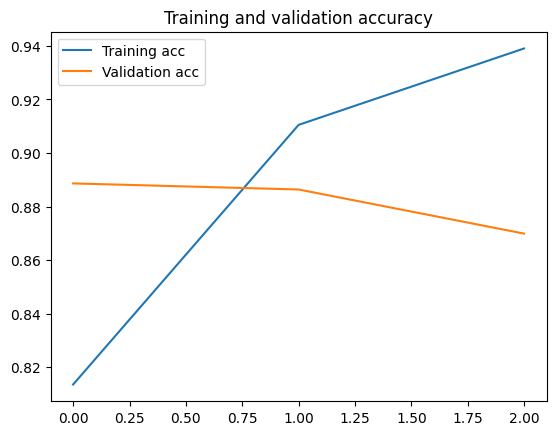

In [ ]:
plt.plot(fit.history['categorical_accuracy'], label='Training acc')
plt.plot(fit.history['val_categorical_accuracy'], label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

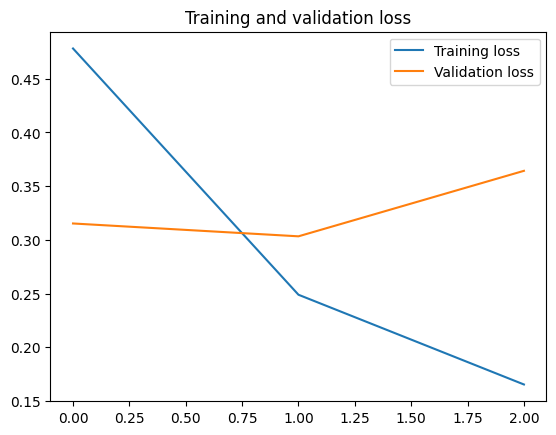

In [ ]:
plt.plot(fit.history['loss'], label='Training loss')
plt.plot(fit.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**TRAIN DATASET**

In [ ]:
train_loss, train_acc = model.evaluate(x_train, y_train)
val_loss, val_acc = model.evaluate(x_val, y_val)
test_loss, test_acc = model.evaluate(x_test, y_test)

print('\nTrain: %.3f, val: %.3f, test: %.3f,' % (train_acc, val_acc, test_acc))

69/69 [==============================] - 1s 21ms/step - loss: 0.3710 - categorical_accuracy: 0.8709

Train: 0.963, val: 0.870, test: 0.871,


In [ ]:
filename = 'lstm.h5'
model.save(filename)

In [ ]:
import io
import json

tokenizer_json = tokenizer.to_json()
with io.open('tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))

**PREDICTION**

In [ ]:
loaded_model = load_model(r'lstm.h5')

In [ ]:
def pred_sentiment(string):
    #remove url
    string = re.sub('url', ' ', string)
    #change Url+other word/special character
    string = re.sub('url\S+', ' ', string)
    #remove non alphanumeric
    string = re.sub(r'[^a-zA-Z0-9]', ' ',string)
    #remove \n
    string = re.sub(r'\\n', ' ',string)
    #remove emoticon
    string = re.sub(r'(\\x(.){2})', ' ',string)
    #Remove additional white spaces
    string = re.sub('[\s]+', ' ', string)
    #Replace #word with word
    string = re.sub(r'#([^\s]+)', r'\1', string)
    #remove hastag
    string = re.sub(r'#[A-Za-z0-9]+', ' ', string)
    #remove RT
    string = re.sub(r'RT[\s]', ' ', string)
    #remove link
    string = re.sub(r'http\S+', ' ', string)
    #remove number
    string = re.sub(r'[0-9]', ' ', string)
    string = string.lower()
    text = [string]

    sek_x = tokenizer.texts_to_sequences(text)
    padd_x = pad_sequences(sek_x)

    classes = loaded_model.predict(padd_x, batch_size=10)

    return classes[0]

In [ ]:
def pred(classes):
   if classes[0] == classes.max():
       print('negative')
   if classes[1] == classes.max():
       print('neutral')
   if classes[2] == classes.max():
       print('positive')

In [ ]:
string = "@saya sangat suka makan di rest7aurant itu karena makanannya enak-enak"
classes = pred_sentiment(string)
pred = pred(classes)

print("Text :", string[0])
print("Sentiment :", pred)

1/1 [==============================] - 0s 49ms/step
positive
Text : @
Sentiment : None


**USING CROSS VALIDATION**

In [ ]:
predictions = model.predict(x_test)
y_preds = predictions
matrix_new = metrics.classification_report(y_test.argmax(axis=1), y_preds.argmax(axis=1))
print(matrix_new)

69/69 [==============================] - 3s 29ms/step
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       680
           1       0.79      0.81      0.80       239
           2       0.89      0.93      0.91      1281

    accuracy                           0.87      2200
   macro avg       0.85      0.84      0.84      2200
weighted avg       0.87      0.87      0.87      2200



In [ ]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)

accuracies = []

for iteration, data in enumerate(kf.split(x), start=1):
  data_train = x[data[0]]
  target_train = y[data[0]]

  data_test = x[data[1]]
  target_test = y[data[1]]

  model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=100000, output_dim=128),
    tf.keras.layers.LSTM(64, dropout=0.2), #to delete 2% from 64
    tf.keras.layers.Dense(8, activation='relu'),
    #when biner(1 or 0) activation is sigmoid , because morethan 2 then is softmax
    tf.keras.layers.Dense(3, activation='softmax')
  ])

  callbacks = EarlyStopping(monitor='val_loss', mode='min', verbose=0)

  #optimizer
  optimizer = keras.optimizers.Adam(learning_rate=0.001)

  #model compile
  #use categorical_crossentropy because we have 3 sentiment, if 2 sentiment we use binary_crossentrophy
  model.compile(loss='categorical_crossentropy', optimizer=optimizer,
                metrics=['categorical_accuracy']) #calclute accuracy for data training

  num_epochs = 10 #1000
  fit = model.fit(x_train,
                y_train,
                batch_size = 10,
                epochs=num_epochs,
                validation_data=(x_val, y_val),
                callbacks = [callbacks]
  )

  predictions1 = model.predict(x_test)
  y_preds1 = predictions1
  accuracy = accuracy_score(y_test.argmax(axis=1), y_preds1.argmax(axis=1))

  print("Number of training", iteration)
  print(classification_report(y_test.argmax(axis=1), y_preds.argmax(axis=1)))
  print("-------------------------------------------------------------------")

  accuracies.append(accuracy)

average_accuracy = np.mean(accuracies)

print()
print()
print()
print("Average accuracy :", average_accuracy)

Epoch 1/10
704/704 [==============================] - 275s 388ms/step - loss: 0.4810 - categorical_accuracy: 0.8089 - val_loss: 0.3496 - val_categorical_accuracy: 0.8653
Epoch 2/10
704/704 [==============================] - 270s 383ms/step - loss: 0.2419 - categorical_accuracy: 0.9091 - val_loss: 0.3193 - val_categorical_accuracy: 0.8807
Epoch 3/10
69/69 [==============================] - 4s 52ms/step
Number of training 1
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       680
           1       0.79      0.81      0.80       239
           2       0.89      0.93      0.91      1281

    accuracy                           0.87      2200
   macro avg       0.85      0.84      0.84      2200
weighted avg       0.87      0.87      0.87      2200

-------------------------------------------------------------------
Epoch 1/10
704/704 [==============================] - 269s 377ms/step - loss: 0.5424 - categorical_accuracy: 0.8004 - val_los

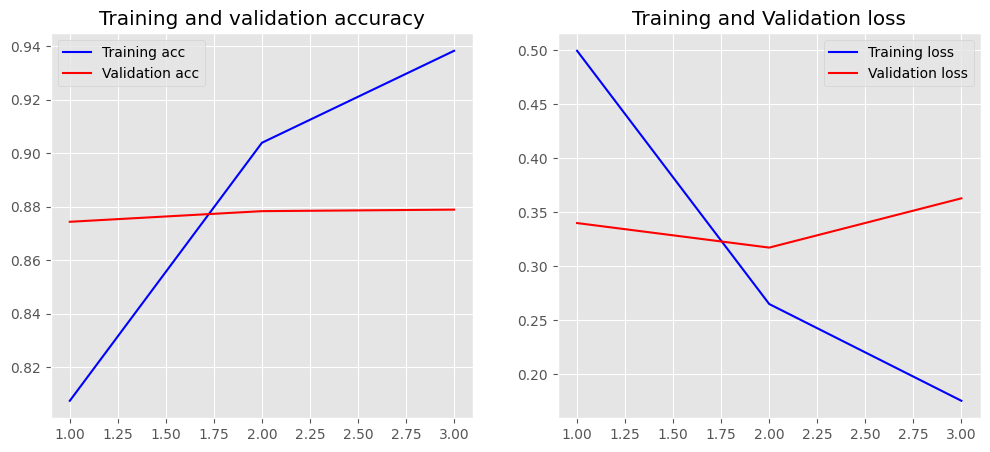

In [ ]:
plt.style.use('ggplot')

def plot_result(fit):
  acc = fit.history['categorical_accuracy']
  val_acc = fit.history['val_categorical_accuracy']
  loss = fit.history['loss']
  val_loss = fit.history['val_loss']
  x = range(1, len(acc) + 1)

  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)
  plt.plot(x, acc, 'b', label='Training acc')
  plt.plot(x, val_acc, 'r', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.subplot(1, 2, 2)
  plt.plot(x, loss, 'b', label='Training loss')
  plt.plot(x, val_loss, 'r', label='Validation loss')
  plt.title('Training and Validation loss')
  plt.legend()

%matplotlib inline
plot_result(fit)

In [ ]:
filename = 'model.h5'
model.save(filename)

**PREDICTION**

In [ ]:
original_text =  '''
@saya sangat suk4a makan di rest7aurant itu karena makanannya enak-enak
'''

#cleaning_data
def cleansing(string):
  string = cleaning_data(string)

  return string


sentiment = ['negative', 'neutral', 'positive']

text = [cleansing(original_text)]
predicted = tokenizer.texts_to_sequences(text)
# Padding change token to matrix/vector
choice = pad_sequences(predicted)

model=load_model('model.h5')
prediction = model.predict(choice)
polarity = np.argmax(prediction[0])

print("Text :", text[0])
print("Sentiment :", sentiment[polarity])

1/1 [==============================] - 1s 577ms/step
Text :    saya sangat suk4a makan di rest7aurant itu karena makanannya enak enak 
Sentiment : positive


In [ ]:
# dia suka membaca buku pengetahuan Negative